In [11]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_excel('Airlines+Data (1).xlsx')

In [3]:
df.head()

Month  Passengers
0 1995-01-01         112
1 1995-02-01         118
2 1995-03-01         132
3 1995-04-01         129
4 1995-05-01         121

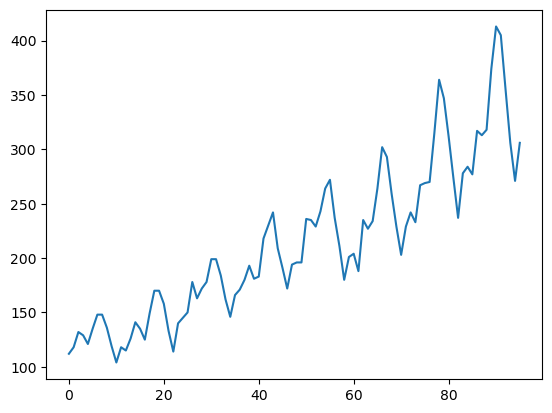

In [6]:
df.Passengers.plot()
plt.show()

## Plotting moving averages

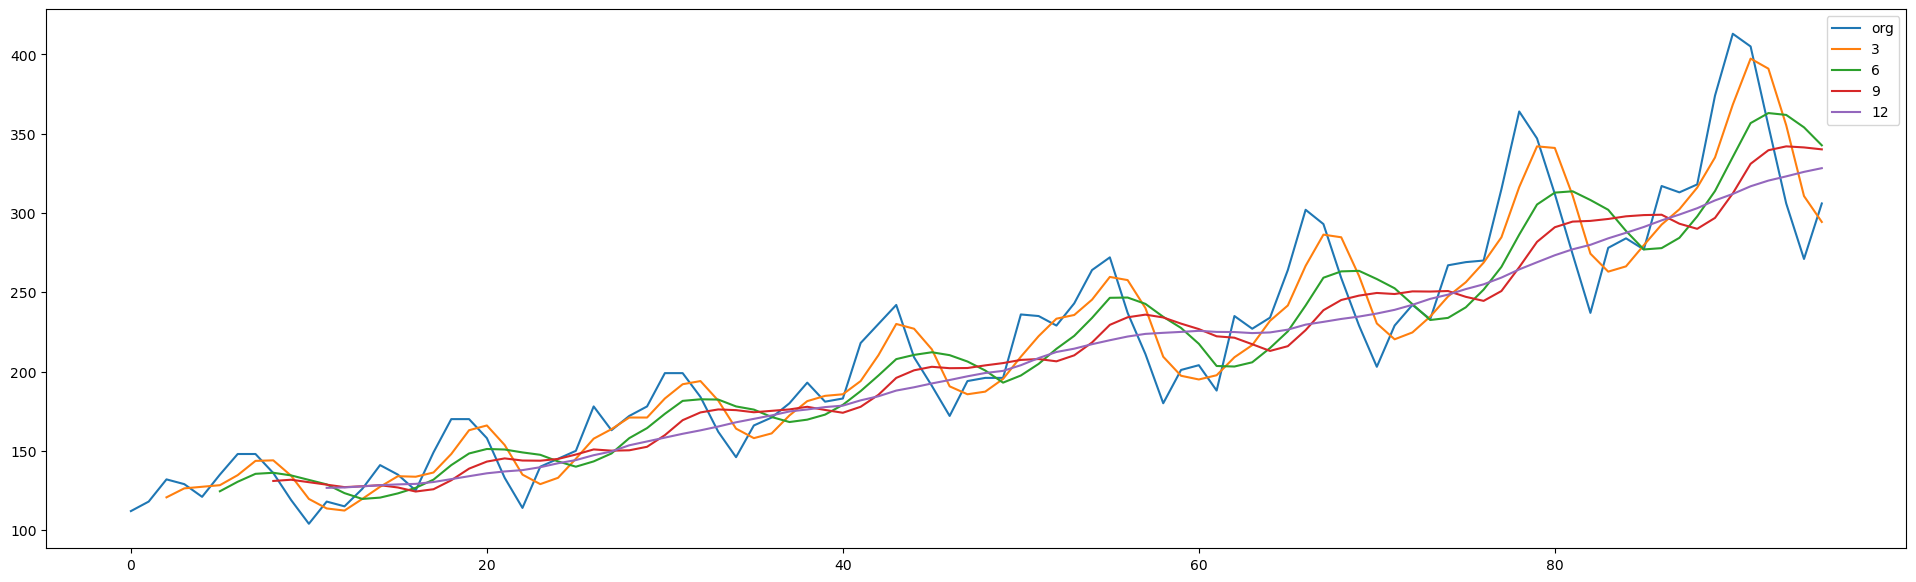

In [8]:
plt.figure(figsize=(24,7))
df.Passengers.plot(label="org")
for i in range(3,15,3):
    df["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

## Time series decomposition plot

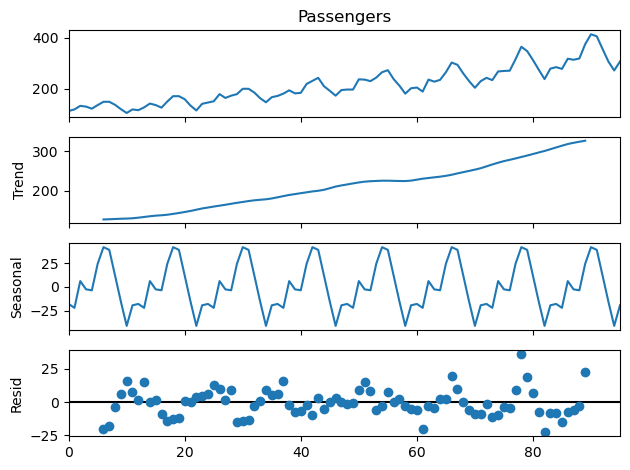

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(df.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

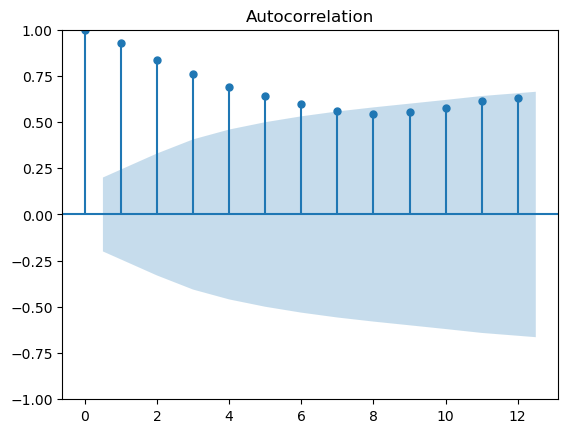

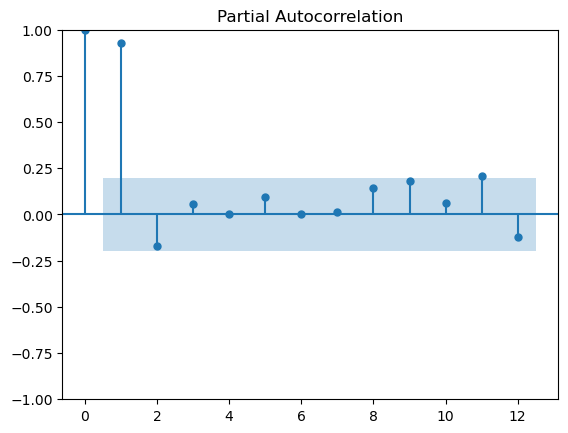

In [10]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df.Passengers,lags=12)
tsa_plots.plot_pacf(df.Passengers,lags=12)
plt.show()

In [12]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [13]:
weights = np.array([0.1, 0.2, 0.3, 0.4])

In [14]:
df1=pd.DataFrame()
df1['Passengers']=df.Passengers
df1['WMA'] = df1['Passengers'].rolling(4).apply(lambda x: np.sum(weights*x))
df1

Passengers    WMA
0          112    NaN
1          118    NaN
2          132    NaN
3          129  126.0
4          121  125.3
..         ...    ...
91         405  392.5
92         355  383.5
93         306  351.2
94         271  311.7
95         306  300.4

[96 rows x 2 columns]

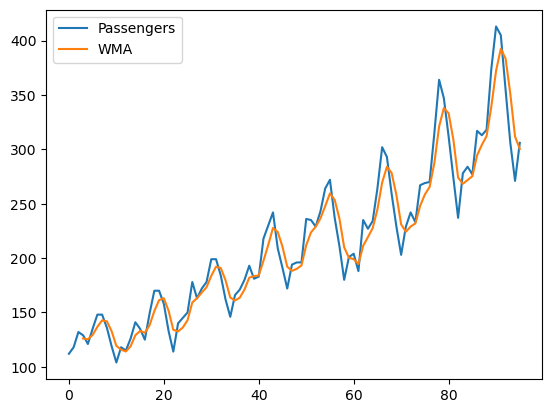

In [17]:
df1.Passengers.plot(kind='line')
df1.WMA.plot(kind='line')
plt.legend()
plt.show()

## Splitting data

In [18]:
df.shape

(96, 2)

In [20]:
train=df.head(82)
test=df.tail(14)

In [21]:
train

Month  Passengers
0  1995-01-01         112
1  1995-02-01         118
2  1995-03-01         132
3  1995-04-01         129
4  1995-05-01         121
..        ...         ...
77 2001-06-01         315
78 2001-07-01         364
79 2001-08-01         347
80 2001-09-01         312
81 2001-10-01         274

[82 rows x 2 columns]

In [22]:
test

Month  Passengers
82 2001-11-01         237
83 2001-12-01         278
84 2002-01-01         284
85 2002-02-01         277
86 2002-03-01         317
87 2002-04-01         313
88 2002-05-01         318
89 2002-06-01         374
90 2002-07-01         413
91 2002-08-01         405
92 2002-09-01         355
93 2002-10-01         306
94 2002-11-01         271
95 2002-12-01         306

In [23]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
ses_model = SimpleExpSmoothing(train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_ses,test.Passengers)

12.187436131830044

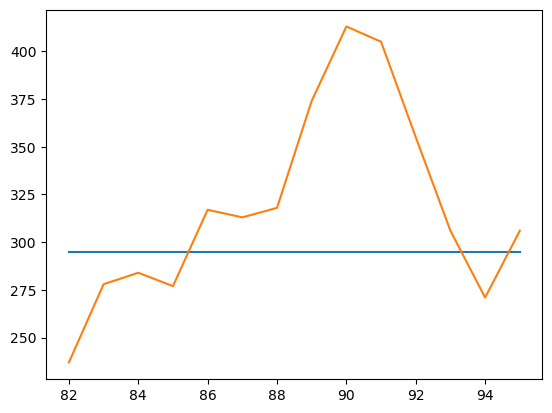

In [30]:
plt.plot(pred_ses)
plt.plot(test.Passengers)
plt.show()

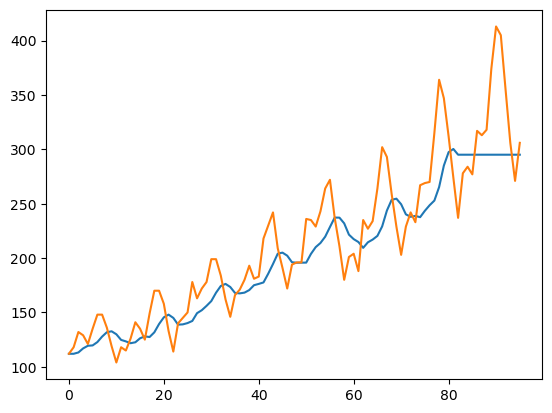

In [32]:
plt.plot(ses_model.predict(start=df.index[0],end=df.index[-1]))
plt.plot(df.Passengers)
plt.show()

In [33]:
acc_ses={}
for i in range(101):
    ses_model = SimpleExpSmoothing(train["Passengers"]).fit(smoothing_level=i/100)
    pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
    acc_ses[MAPE(pred_ses,test.Passengers)]=i

print('{}:{}'.format(acc_ses[min(acc_ses.keys())],min(acc_ses.keys())))

36:11.747213592970018


In [34]:
ses_model = SimpleExpSmoothing(train["Passengers"]).fit(smoothing_level=0.24)
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_ses,test.Passengers)

11.96968092347764

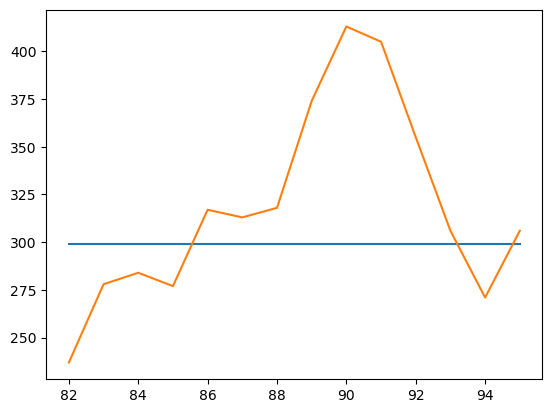

In [35]:
plt.plot(pred_ses)
plt.plot(test.Passengers)
plt.show()

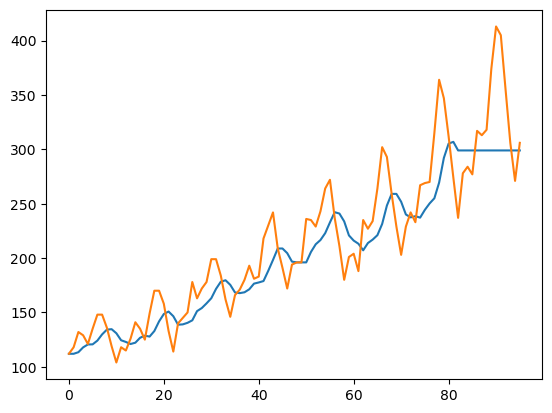

In [38]:
plt.plot(ses_model.predict(start=df.index[0],end=df.index[-1]))
plt.plot(df.Passengers)
plt.show()

In [39]:
from statsmodels.tsa.holtwinters import Holt
holt_model = Holt(train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.3)
pred_holt = holt_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_holt,test.Passengers)

33.37433001567988

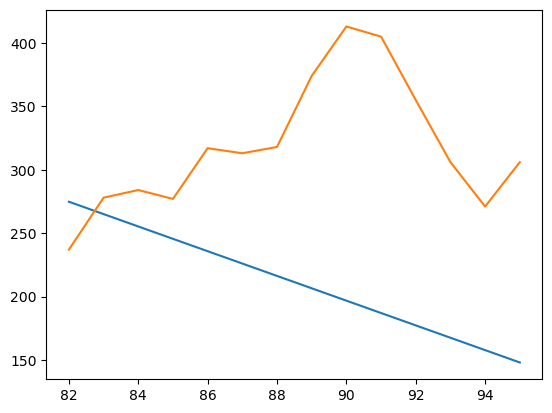

In [41]:
plt.plot(pred_holt)
plt.plot(test.Passengers)
plt.show()

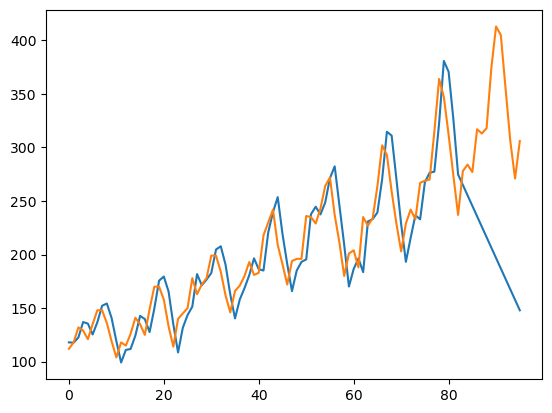

In [43]:
plt.plot(holt_model.predict(start=df.index[0],end=df.index[-1]))
plt.plot(df.Passengers)
plt.show()

In [44]:
accuracy={}
for i in range(0,101):
    for j in range(0,101):
        holt_model = Holt(train["Passengers"]).fit(smoothing_level=i/100, smoothing_slope=j/100)
        pred_holt = holt_model.predict(start = test.index[0],end = test.index[-1])
        accuracy[MAPE(pred_holt,test.Passengers)]=(i,j)

In [45]:
accuracy[min(accuracy.keys())]


(3, 59)

In [46]:
min(accuracy.keys())

10.658399175520318

In [47]:
holt_model = Holt(train["Passengers"]).fit(smoothing_level=0.02, smoothing_slope=0.63)
pred_holt = holt_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_holt,test.Passengers)

11.124976188126643

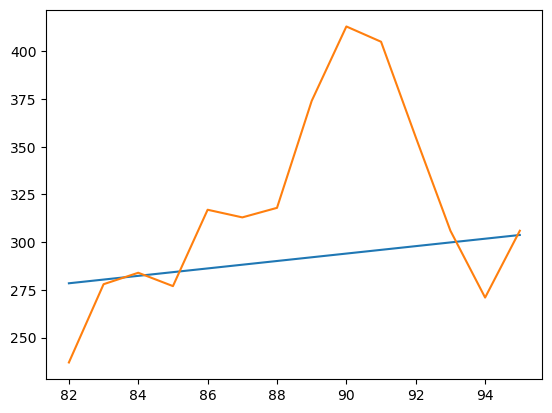

In [48]:
plt.plot(pred_holt)
plt.plot(test.Passengers)
plt.show()

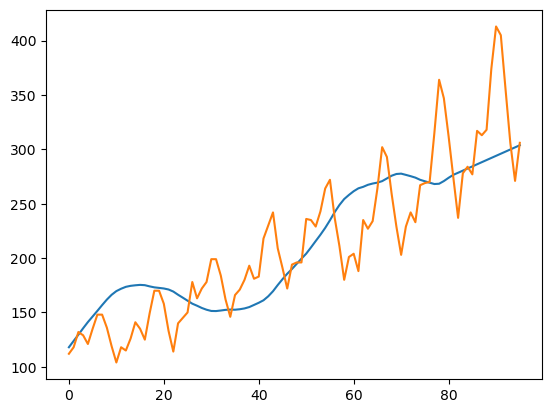

In [50]:
plt.plot(holt_model.predict(start=df.index[0],end=df.index[-1]))
plt.plot(df.Passengers)
plt.show()

In [52]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
hw_add_add = ExponentialSmoothing(train["Passengers"],seasonal='add', trend='add',seasonal_periods=12).fit()
pred_hw_add = hw_add_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hw_add,test.Passengers)

5.78913241311904

In [53]:
## Plotting the predictions on the test data

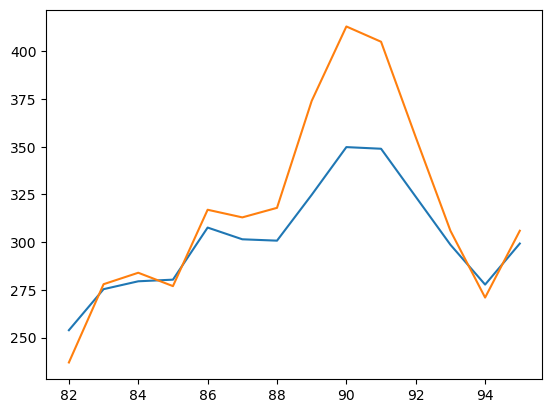

In [56]:
plt.plot(pred_hw_add)
plt.plot(test.Passengers)
plt.show()

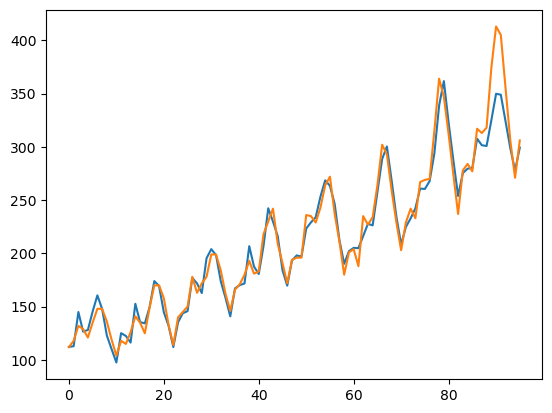

In [57]:
plt.plot(hw_add_add.predict(start=df.index[0],end=df.index[-1]))
plt.plot(df.Passengers)
plt.show()

In [58]:
params=['add','mul']
acc_hw={}
for i in params:
    for j in params:
        hw = ExponentialSmoothing(train["Passengers"],seasonal=i, trend=j,seasonal_periods=12).fit()
        pred_hw = hw.predict(start = test.index[0],end = test.index[-1])
        acc_hw[MAPE(pred_hw,test.Passengers)]=(i,j)

In [61]:
acc_hw[min(acc_hw.keys())]

('mul', 'mul')

In [62]:
min(acc_hw.keys())

1.8266544709093773

In [63]:
hw = ExponentialSmoothing(train["Passengers"],seasonal='mul', trend='mul',seasonal_periods=12).fit()
pred_hw = hw.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hw,test.Passengers)

1.8266544709093773

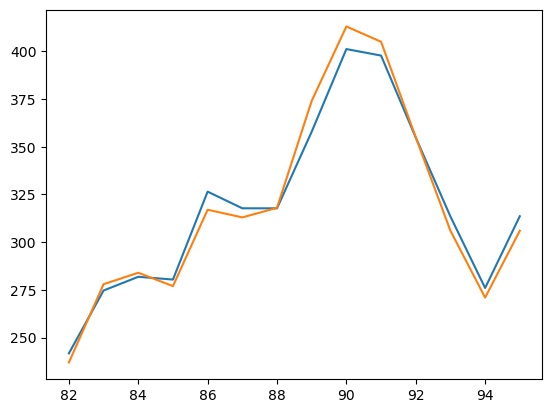

In [64]:
plt.plot(pred_hw)
plt.plot(test.Passengers)
plt.show()

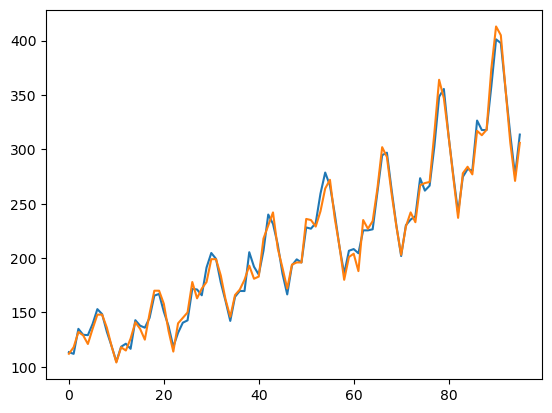

In [66]:
plt.plot(hw.predict(start=df.index[0],end=df.index[-1]))
plt.plot(df.Passengers)
plt.show()

In [67]:
model_final=hw

In [68]:
model_final